##Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

##Load the Data

In [2]:
df = pd.read_csv('/content/clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head()

Unnamed: 0                                id  \
0           0  764c75f661154dac3a6c254cd082ea7d   
1           1  01495c955be7ec5e7f3203406785aae0   
2           2  d5e512dbc8118a830a7b8c7f61d89992   
3           3  21860c2ff2d5df75503b230ce629c253   
4           4  e4773b60d2e68aac94795782abfc006b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
1  foosdfpfkusacimwkcsosbicdxkicaua     29552             0             1260   
2  usilxuppasemubllopkaafesmlibmsdf     10831             0             3112   
3  foosdfpfkusacimwkcsosbicdxkicaua      7726             0                0   
4  lmkebamcaaclubfxadlmueccxoimlema     47019             0             3161   

  date_activ   date_end date_modif_prod date_renewal  ...  price_off_peak_var  \
0 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...            0.167798   
1 2010-04-21 2016-04-21      2010-04-21   2015-04-22  ...            0.118175   
2 2011-07-11 2016-07-11      2011-07-11   2015-07-12  ...            0.166638   
3 2013-01-22 2017-01-22      2015-11-18   2016-01-24  ...            0.164316   
4 2012-04-20 2016-04-20      2012-04-20   2015-04-21  ...            0.146788   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0        0.088409            0.000000           44.444710         0.00000   
1        0.100491            0.074516           40.728885        24.43733   
2        0.087890            0.000000           44.444710         0.00000   
3        0.084927            0.000000           44.444710         0.00000   
4        0.000000            0.000000           44.444710         0.00000   

   price_mid_peak_fix  mean_3m_price_p1 mean_3m_price_p2  mean_3m_price_p3  \
0            0.000000         44.612508         0.088409          0.000000   
1           16.291555         40.847060        24.537821         16.366071   
2            0.000000         44.611348         0.087890          0.000000   
3            0.000000         44.609026         0.084927          0.000000   
4            0.000000         44.591498         0.000000          0.000000   

   churn  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 54 columns]

##Feature Engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with predictive power.

In [4]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [5]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [6]:
df = pd.merge(df, diff, on='id')
df.head()

Unnamed: 0                                id  \
0           0  764c75f661154dac3a6c254cd082ea7d   
1           1  01495c955be7ec5e7f3203406785aae0   
2           2  d5e512dbc8118a830a7b8c7f61d89992   
3           3  21860c2ff2d5df75503b230ce629c253   
4           4  e4773b60d2e68aac94795782abfc006b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
1  foosdfpfkusacimwkcsosbicdxkicaua     29552             0             1260   
2  usilxuppasemubllopkaafesmlibmsdf     10831             0             3112   
3  foosdfpfkusacimwkcsosbicdxkicaua      7726             0                0   
4  lmkebamcaaclubfxadlmueccxoimlema     47019             0             3161   

  date_activ   date_end date_modif_prod date_renewal  ...  price_mid_peak_var  \
0 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...            0.000000   
1 2010-04-21 2016-04-21      2010-04-21   2015-04-22  ...            0.074516   
2 2011-07-11 2016-07-11      2011-07-11   2015-07-12  ...            0.000000   
3 2013-01-22 2017-01-22      2015-11-18   2016-01-24  ...            0.000000   
4 2012-04-20 2016-04-20      2012-04-20   2015-04-21  ...            0.000000   

   price_off_peak_fix  price_peak_fix  price_mid_peak_fix  mean_3m_price_p1  \
0           44.444710         0.00000            0.000000         44.612508   
1           40.728885        24.43733           16.291555         40.847060   
2           44.444710         0.00000            0.000000         44.611348   
3           44.444710         0.00000            0.000000         44.609026   
4           44.444710         0.00000            0.000000         44.591498   

   mean_3m_price_p2  mean_3m_price_p3 churn  offpeak_diff_dec_january_energy  \
0          0.088409          0.000000     0                        -0.004670   
1         24.537821         16.366071     0                        -0.007801   
2          0.087890          0.000000     0                        -0.001547   
3          0.084927          0.000000     0                        -0.008152   
4          0.000000          0.000000     0                        -0.003423   

   offpeak_diff_dec_january_power  
0                        0.177779  
1                        0.162916  
2                        0.177779  
3                        0.177779  
4                        0.177779  

[5 rows x 56 columns]

---

## Average price changes across periods

We can now enhance the feature that our colleague made by calculating the average price changes across individual periods, instead of the entire year.

In [7]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [8]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [9]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

Unnamed: 0                                id  \
0           0  764c75f661154dac3a6c254cd082ea7d   
1           1  01495c955be7ec5e7f3203406785aae0   
2           2  d5e512dbc8118a830a7b8c7f61d89992   
3           3  21860c2ff2d5df75503b230ce629c253   
4           4  e4773b60d2e68aac94795782abfc006b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
1  foosdfpfkusacimwkcsosbicdxkicaua     29552             0             1260   
2  usilxuppasemubllopkaafesmlibmsdf     10831             0             3112   
3  foosdfpfkusacimwkcsosbicdxkicaua      7726             0                0   
4  lmkebamcaaclubfxadlmueccxoimlema     47019             0             3161   

  date_activ   date_end date_modif_prod date_renewal  ...  mean_3m_price_p3  \
0 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...          0.000000   
1 2010-04-21 2016-04-21      2010-04-21   2015-04-22  ...         16.366071   
2 2011-07-11 2016-07-11      2011-07-11   2015-07-12  ...          0.000000   
3 2013-01-22 2017-01-22      2015-11-18   2016-01-24  ...          0.000000   
4 2012-04-20 2016-04-20      2012-04-20   2015-04-21  ...          0.000000   

   churn  offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0      0                        -0.004670                        0.177779   
1      0                        -0.007801                        0.162916   
2      0                        -0.001547                        0.177779   
3      0                        -0.008152                        0.177779   
4      0                        -0.003423                        0.177779   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.082090                     0.088421   
1                     0.020314                     0.028965   
2                     0.081795                     0.085745   
3                     0.081538                     0.087640   
4                     0.149044                     0.000000   

   off_peak_mid_peak_var_mean_diff off_peak_peak_fix_mean_diff  \
0                         0.170512                   44.385450   
1                         0.049279                   16.269833   
2                         0.167540                   44.341005   
3                         0.169177                   44.311375   
4                         0.149044                   44.385450   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                     0.000000                        44.385450  
1                     8.134914                        24.404747  
2                     0.000000                        44.341005  
3                     0.000000                        44.311375  
4                     0.000000                        44.385450  

[5 rows x 62 columns]

This feature may be useful because it adds more granularity to the existing feature that my colleague found to be useful. Instead of looking at differences across an entire year, we have now created features that look at mean average price differences across different time periods (`off_peak`, `peak`, `mid_peak`). The dec-jan feature may reveal macro patterns that occur over an entire year, whereas inter-time-period features may reveal patterns on a micro scale between months.

---

## Max price changes across periods and months

Another way we can enhance the feature from our colleague is to look at the maximum change in prices across periods and months.

In [10]:
# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [11]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [12]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [13]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

Unnamed: 0                                id  \
0           0  764c75f661154dac3a6c254cd082ea7d   
1           1  01495c955be7ec5e7f3203406785aae0   
2           2  d5e512dbc8118a830a7b8c7f61d89992   
3           3  21860c2ff2d5df75503b230ce629c253   
4           4  e4773b60d2e68aac94795782abfc006b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
1  foosdfpfkusacimwkcsosbicdxkicaua     29552             0             1260   
2  usilxuppasemubllopkaafesmlibmsdf     10831             0             3112   
3  foosdfpfkusacimwkcsosbicdxkicaua      7726             0                0   
4  lmkebamcaaclubfxadlmueccxoimlema     47019             0             3161   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
1 2010-04-21 2016-04-21      2010-04-21   2015-04-22  ...   
2 2011-07-11 2016-07-11      2011-07-11   2015-07-12  ...   
3 2013-01-22 2017-01-22      2015-11-18   2016-01-24  ...   
4 2012-04-20 2016-04-20      2012-04-20   2015-04-21  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.170512                    44.385450   
1                         0.049279                    16.269833   
2                         0.167540                    44.341005   
3                         0.169177                    44.311375   
4                         0.149044                    44.385450   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                     0.000000                        44.385450   
1                     8.134914                        24.404747   
2                     0.000000                        44.341005   
3                     0.000000                        44.311375   
4                     0.000000                        44.385450   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.084587                            0.089162   
1                            0.022581                            0.031859   
2                            0.083972                            0.087890   
3                            0.084587                            0.088815   
4                            0.151250                            0.000000   

   off_peak_mid_peak_var_max_monthly_diff off_peak_peak_fix_max_monthly_diff  \
0                                0.172468                          44.444710   
1                                0.054440                          16.291555   
2                                0.168185                          44.444710   
3                                0.172468                          44.444710   
4                                0.151250                          44.444710   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                            0.000000                                44.44471  
1                            8.145775                                24.43733  
2                            0.000000                                44.44471  
3                            0.000000                                44.44471  
4                            0.000000                                44.44471  

[5 rows x 68 columns]

I thought that calculating the maximum price change between months and time periods would be a good feature to create because I was trying to think from the perspective of a PowerCo client. As a Utilities customer, there is nothing more annoying than sudden price changes between months, and a large increase in prices within a short time span would be an influencing factor in causing me to look at other utilities providers for a better deal. Since we are trying to predict churn for this use case, I thought this would be an interesting feature to include.

This section covers extra feature engineering that you may have thought of, as well as different ways you can transform your data to account for some of its statistical properties that we saw before, such as skewness.

### Tenure

How long a company has been a client of PowerCo.

In [14]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [15]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
13      0.153846
2       0.145455
3       0.141473
4       0.136279
6       0.083333
5       0.081954
7       0.078054
8       0.075472
12      0.063830
10      0.055556
11      0.046154
9       0.000000

We can see that companies who have only been a client for 4 or less months are much more likely to churn compared to companies that have been a client for longer. Interestingly, the difference between 4 and 5 months is about 4%, which represents a large jump in likelihood for a customer to churn compared to the other differences between ordered tenure values. Perhaps this reveals that getting a customer to over 4 months tenure is actually a large milestone with respect to keeping them as a long term customer. 

This is an interesting feature to keep for modelling because clearly how long you've been a client, has a influence on the chance of a client churning.

### Transforming dates into months

- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [16]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [17]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

Dates as a datetime object are not useful for a predictive model, so we needed to use the datetimes to create some other features that may hold some predictive power. 

Using intuition, you could assume that a client who has been an active client of PowerCo for a longer amount of time may have more loyalty to the brand and is more likely to stay. Whereas a newer client may be more volatile. Hence the addition of the `months_activ` feature.

As well as this, if we think from the perspective of a client with PowerCo, if you're coming toward the end of your contract with PowerCo your thoughts could go a few ways. You could be looking for better deals for when your contract ends, or you might want to see out your contract and sign another one. One the other hand if you've only just joined, you may have a period where you're allowed to leave if you're not satisfied. Furthermore, if you're in the middle of your contract, their may be charges if you wanted to leave, deterring clients from churning mid-way through their agreement. So, I think `months_to_end` will be an interesting feature because it may reveal patterns and behaviours about timing of churn.

My belief is that if a client has made recent updates to their contract, they are more likely to be satisfied or at least they have received a level of customer service to update or change their existing services. I believe this to be a positive sign, they are an engaged customer, and so I believe `months_modif_prod` will be an interesting feature to include because it shows the degree of how 'engaged' a client is with PowerCo.

Finally the number of months since a client last renewed a contract I believe will be an interesting feature because once again, it shows the degree to which that client is engaged. It also goes a step further than just engagement, it shows a level of commitment if a client renews their contract. For this reason, I believe `months_renewal` will be a good feature to include.

In [18]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

Unnamed: 0                                id  \
0           0  764c75f661154dac3a6c254cd082ea7d   
1           1  01495c955be7ec5e7f3203406785aae0   
2           2  d5e512dbc8118a830a7b8c7f61d89992   
3           3  21860c2ff2d5df75503b230ce629c253   
4           4  e4773b60d2e68aac94795782abfc006b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
1  foosdfpfkusacimwkcsosbicdxkicaua     29552             0             1260   
2  usilxuppasemubllopkaafesmlibmsdf     10831             0             3112   
3  foosdfpfkusacimwkcsosbicdxkicaua      7726             0                0   
4  lmkebamcaaclubfxadlmueccxoimlema     47019             0             3161   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0              47.96                   0                       0.0   
1             864.73                 751                       0.0   
2            1204.58                3112                       0.0   
3             914.10                   0                       0.0   
4            1687.29                1080                       0.0   

   forecast_meter_rent_12m  ...  peak_mid_peak_var_max_monthly_diff  \
0                    38.72  ...                            0.089162   
1                   144.49  ...                            0.031859   
2                    20.94  ...                            0.087890   
3                    74.66  ...                            0.088815   
4                    16.08  ...                            0.000000   

   off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                                0.172468                           44.444710   
1                                0.054440                           16.291555   
2                                0.168185                           44.444710   
3                                0.172468                           44.444710   
4                                0.151250                           44.444710   

  peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                           0.000000                                44.44471   
1                           8.145775                                24.43733   
2                           0.000000                                44.44471   
3                           0.000000                                44.44471   
4                           0.000000                                44.44471   

   tenure  months_activ  months_to_end  months_modif_prod  months_renewal  
0       6            68              3                 68               8  
1       6            68              3                 68               8  
2       5            53              6                 53               5  
3       4            35             12                  1               0  
4       4            44              3                 44               8  

[5 rows x 69 columns]

### Transforming Boolean data

#### has_gas

We simply want to transform this column from being categorical to being a binary flag

In [19]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.106956
1        0.079395

If a customer also buys gas from PowerCo, it shows that they have multiple products and are a loyal customer to the brand. Hence, it is no surprise that customers who do not buy gas are almost 2% more likely to churn than customers who also buy gas from PowerCo. Hence, this is a useful feature.

### Transforming categorical data

A predictive model cannot accept categorical or `string` values, hence as a data scientist you need to encode categorical features into numerical representations in the most compact and discriminative way possible.

The simplest method is to map each category to an integer (label encoding), however this is not always appropriate beecause it then introduces the concept of an order into a feature which may not inherently be present `0 < 1 < 2 < 3 ...`

Another way to encode categorical features is to use `dummy variables` AKA `one hot encoding`. This create a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category.

#### channel_sales

In [20]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    2790
MISSING                             1369
lmkebamcaaclubfxadlmueccxoimlema     714
usilxuppasemubllopkaafesmlibmsdf     567
ewpakwlliwisiwduibdlfmalxowmwpci     397
sddiedcslfslkckwlfkdpoeeailfpeds       6
epumfxlbckeskwekxbiuasklxalciiuu       1
fixdbufsefwooaasfcxdxadsiekoceaa       1
Name: channel_sales, dtype: int64

We have 8 categories, so we will create 8 dummy variables from this column. However, as you can see the last 3 categories in the output above, show that they only have 11, 3 and 2 occurrences respectively. Considering that our dataset has about 14000 rows, this means that these dummy variables will be almost entirely 0 and so will not add much predictive power to the model at all (since they're almost entirely a constant value and provide very little).

For this reason, we will drop these 3 dummy variables.

In [21]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  764c75f661154dac3a6c254cd082ea7d       544             0   
1           1  01495c955be7ec5e7f3203406785aae0     29552             0   
2           2  d5e512dbc8118a830a7b8c7f61d89992     10831             0   
3           3  21860c2ff2d5df75503b230ce629c253      7726             0   
4           4  e4773b60d2e68aac94795782abfc006b     47019             0   

   cons_last_month  forecast_cons_12m  forecast_cons_year  \
0                0              47.96                   0   
1             1260             864.73                 751   
2             3112            1204.58                3112   
3                0             914.10                   0   
4             3161            1687.29                1080   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                    38.72   
1                       0.0                   144.49   
2                       0.0                    20.94   
3                       0.0                    74.66   
4                       0.0                    16.08   

   forecast_price_energy_off_peak  ...  tenure  months_activ  months_to_end  \
0                        0.165794  ...       6            68              3   
1                        0.115174  ...       6            68              3   
2                        0.164637  ...       5            53              6   
3                        0.162327  ...       4            35             12   
4                        0.144902  ...       4            44              3   

   months_modif_prod  months_renewal  channel_MISSING  \
0                 68               8                0   
1                 68               8                0   
2                 53               5                0   
3                  1               0                0   
4                 44               8                0   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         1   
2                                         0   
3                                         1   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         1   

  channel_usilxuppasemubllopkaafesmlibmsdf  
0                                        0  
1                                        0  
2                                        1  
3                                        0  
4                                        0  

[5 rows x 73 columns]

origin_up

In [22]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    2966
kamkkxfxxuwbdslkwifmmcsiusiuosws    1588
ldkssxwpmemidmecebumciepifcamkci    1262
MISSING                               28
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

Similar to `channel_sales` the last 3 categories in the output above show very low frequency, so we will remove these from the features after creating dummy variables.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5845 entries, 0 to 5844
Data columns (total 73 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   Unnamed: 0                                5845 non-null   int64   
 1   id                                        5845 non-null   object  
 2   cons_12m                                  5845 non-null   int64   
 3   cons_gas_12m                              5845 non-null   int64   
 4   cons_last_month                           5845 non-null   int64   
 5   forecast_cons_12m                         5845 non-null   float64 
 6   forecast_cons_year                        5845 non-null   int64   
 7   forecast_discount_energy                  5845 non-null   float64 
 8   forecast_meter_rent_12m                   5845 non-null   float64 
 9   forecast_price_energy_off_peak            5845 non-null   float64 
 10  forecast_price_energy_pe

In [24]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING',  'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  764c75f661154dac3a6c254cd082ea7d       544             0   
1           1  01495c955be7ec5e7f3203406785aae0     29552             0   
2           2  d5e512dbc8118a830a7b8c7f61d89992     10831             0   
3           3  21860c2ff2d5df75503b230ce629c253      7726             0   
4           4  e4773b60d2e68aac94795782abfc006b     47019             0   

   cons_last_month  forecast_cons_12m  forecast_cons_year  \
0                0              47.96                   0   
1             1260             864.73                 751   
2             3112            1204.58                3112   
3                0             914.10                   0   
4             3161            1687.29                1080   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                    38.72   
1                       0.0                   144.49   
2                       0.0                    20.94   
3                       0.0                    74.66   
4                       0.0                    16.08   

   forecast_price_energy_off_peak  ...  months_modif_prod  months_renewal  \
0                        0.165794  ...                 68               8   
1                        0.115174  ...                 68               8   
2                        0.164637  ...                 53               5   
3                        0.162327  ...                  1               0   
4                        0.144902  ...                 44               8   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                0                                         0   
2                0                                         0   
3                0                                         0   
4                0                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         1   
2                                         0   
3                                         1   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         1   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           1   
1                                           0   
2                                           1   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           1   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           0  
1                                           1  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 75 columns]

### Transforming numerical data

In the previous exercise we saw that some variables were highly skewed. The reason why we need to treat skewness is because some predictive models have inherent assumptions about the distribution of the features that are being supplied to it. Such models are called `parametric` models, and they typically assume that all variables are both independent and normally distributed. 

Skewness isn't always a bad thing, but as a rule of thumb it is always good practice to treat highly skewed variables because of the reason stated above, but also as it can improve the speed at which predictive models are able to converge to its best solution.

There are many ways that you can treat skewed variables. You can apply transformations such as:
- Square root
- Cubic root
- Logarithm

to a continuous numeric column and you will notice the distribution changes. For this use case we will use the 'Logarithm' transformation for the positively skewed features. 

<b>Note:</b> We cannot apply log to a value of 0, so we will add a constant of 1 to all the values

First I want to see the statistics of the skewed features, so that we can compare before and after transformation

In [25]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  5.845000e+03  5.845000e+03      5845.000000        5845.000000   
mean   1.566981e+05  2.629297e+04     15961.438494        1888.314448   
std    5.696047e+05  1.494022e+05     64635.599361        2344.994170   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.699000e+03  0.000000e+00         0.000000         505.670000   
50%    1.437700e+04  0.000000e+00       789.000000        1116.860000   
75%    4.172300e+04  0.000000e+00      3450.000000        2471.670000   
max    6.207104e+06  2.813019e+06    771203.000000       61357.170000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count         5845.000000               5845.000000              5845.000000   
mean          1360.460907                  1.015056                62.711986   
std           2602.696973                  5.218148                64.472407   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.170000   
50%            332.000000                  0.000000                18.760000   
75%           1734.000000                  0.000000               130.990000   
max          63969.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                     5845.000000                 5845.000000   
mean                         0.137101                    0.049690   
std                          0.024151                    0.049194   
min                          0.000000                    0.000000   
25%                          0.116509                    0.000000   
50%                          0.143166                    0.083849   
75%                          0.146120                    0.098841   
max                          0.273963                    0.168092   

       forecast_price_pow_off_peak  
count                  5845.000000  
mean                     43.106618  
std                       4.310633  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

We can see that the standard deviation for most of these features is quite high.

In [26]:
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [27]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  5845.000000   5845.000000      5845.000000        5845.000000   
mean      4.230351      0.770664         2.283990           2.969339   
std       0.871166      1.704222         1.758641           0.679777   
min       0.000000      0.000000         0.000000           0.000000   
25%       3.755875      0.000000         0.000000           2.704725   
50%       4.157698      0.000000         2.897627           3.048387   
75%       4.620386      0.000000         3.537945           3.393166   
max       6.792889      6.449173         5.887169           4.787872   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count         5845.000000               5845.000000              5845.000000   
mean             1.799814                  1.015056                 1.512782   
std              1.578832                  5.218148                 0.578202   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.234770   
50%              2.522444                  0.000000                 1.295787   
75%              3.239299                  0.000000                 2.120541   
max              4.805976                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                     5845.000000                 5845.000000   
mean                         0.137101                    0.049690   
std                          0.024151                    0.049194   
min                          0.000000                    0.000000   
25%                          0.116509                    0.000000   
50%                          0.143166                    0.083849   
75%                          0.146120                    0.098841   
max                          0.273963                    0.168092   

       forecast_price_pow_off_peak  
count                  5845.000000  
mean                     43.106618  
std                       4.310633  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

Now we can see that for the majority of the features, their standard deviation is much lower after transformation. This is a good thing, it shows that these features are more stable and predictable now.

Let's quickly check the distributions of some of these features too.

<ipython-input-28-bde1d2bd33bc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
<ipython-input-28-bde1d2bd33bc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
<ipython-input-28-bde1d2bd33bc>:5: U

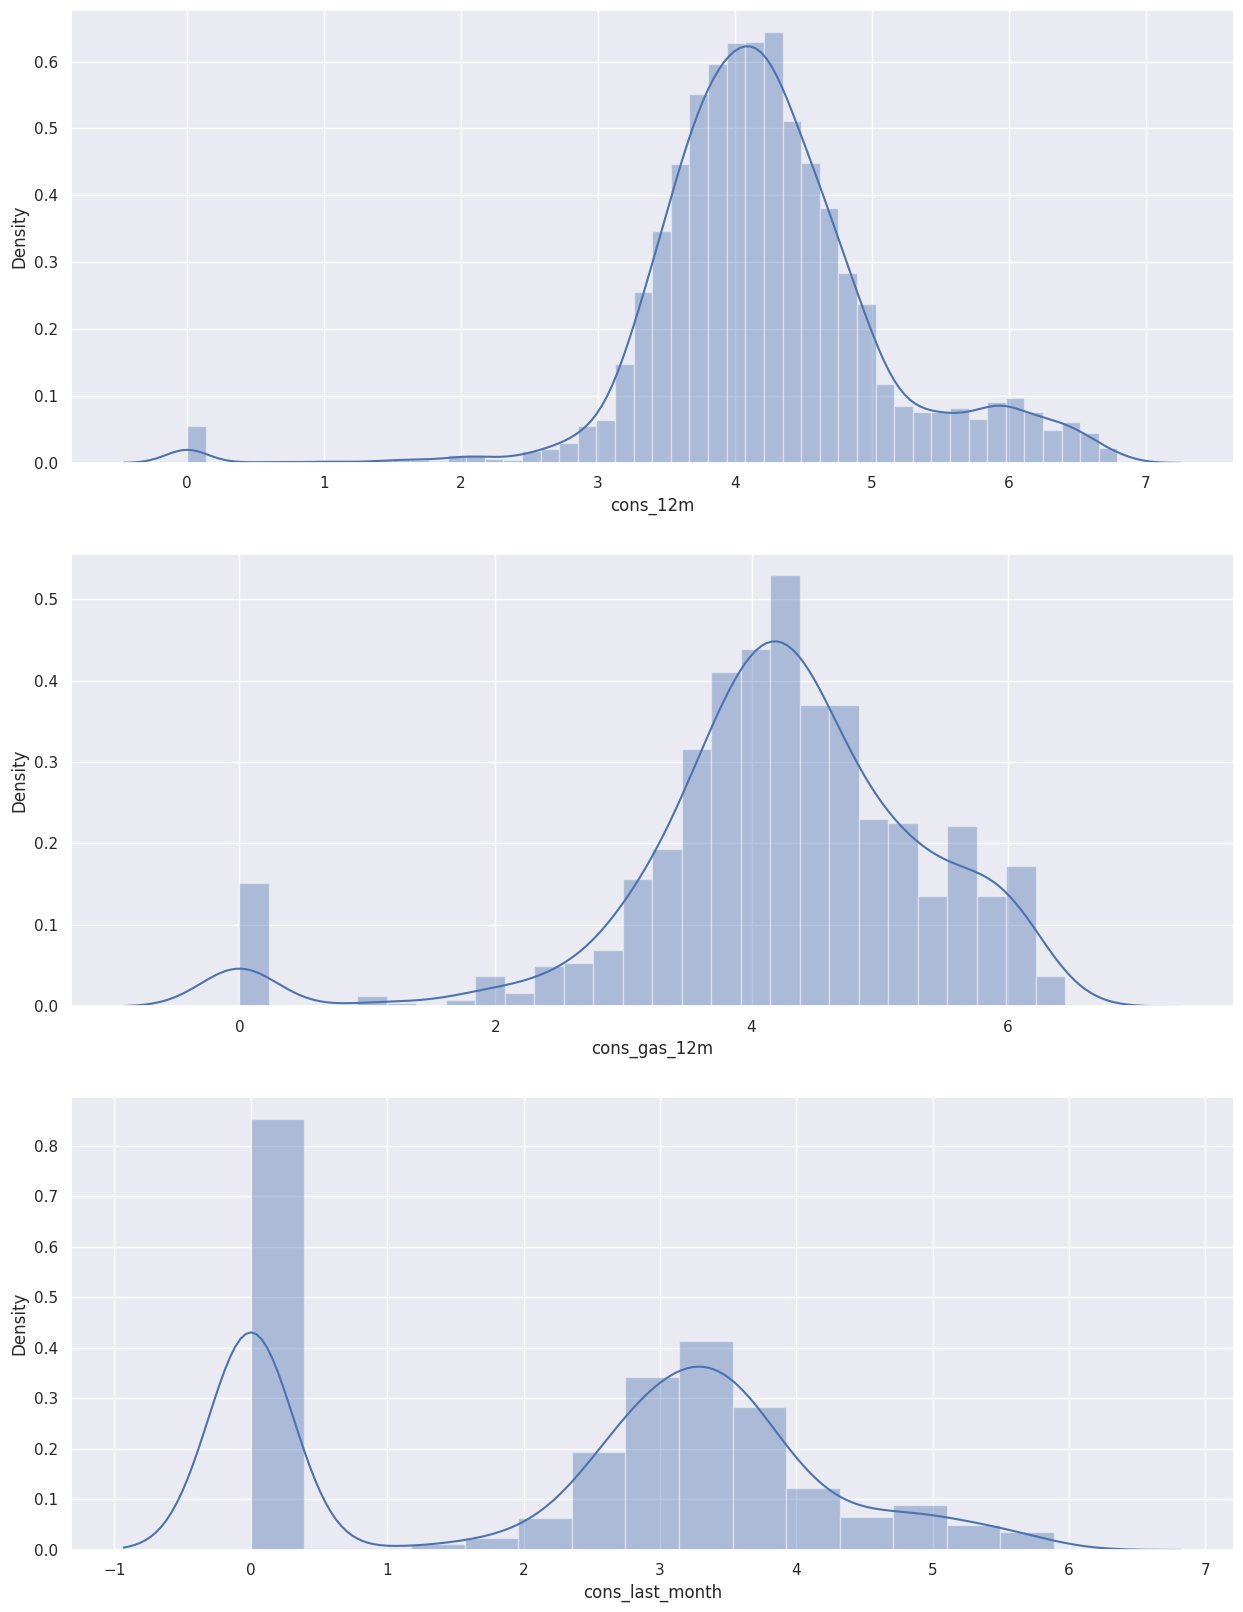

In [28]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 20))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

### Correlations

In terms of creating new features and transforming existing ones, it is very much a trial and error situation that requires iteration. Once we train a predictive model we can see which features work and don't work, we will also know how predictive this set of features is. Based on this, we can come back to feature engineering to enhance our model. 

For now, we will leave feature engineering at this point. Another thing that is always useful to look at is how correlated all of the features are within your dataset.

This is important because it reveals the linear relationships between features. We want features to correlate with `churn`, as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious. This is because 2 columns that have high correlation indicates that they may share a lot of the same information. One of the assumptions of any parametric predictive model (as stated earlier) is that all features must be independent.

For features to be independent, this means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, this breaks this assumption. 

Ideally, you want a set of features that have 0 correlation with all of the independent variables (all features except our target variable) and a high correlation with the target variable (churn). However, this is very rarely the case and it is common to have a small degree of correlation between independent features.

So now let's look at how all the features within the model are correlated.

In [29]:
correlation = df.corr()

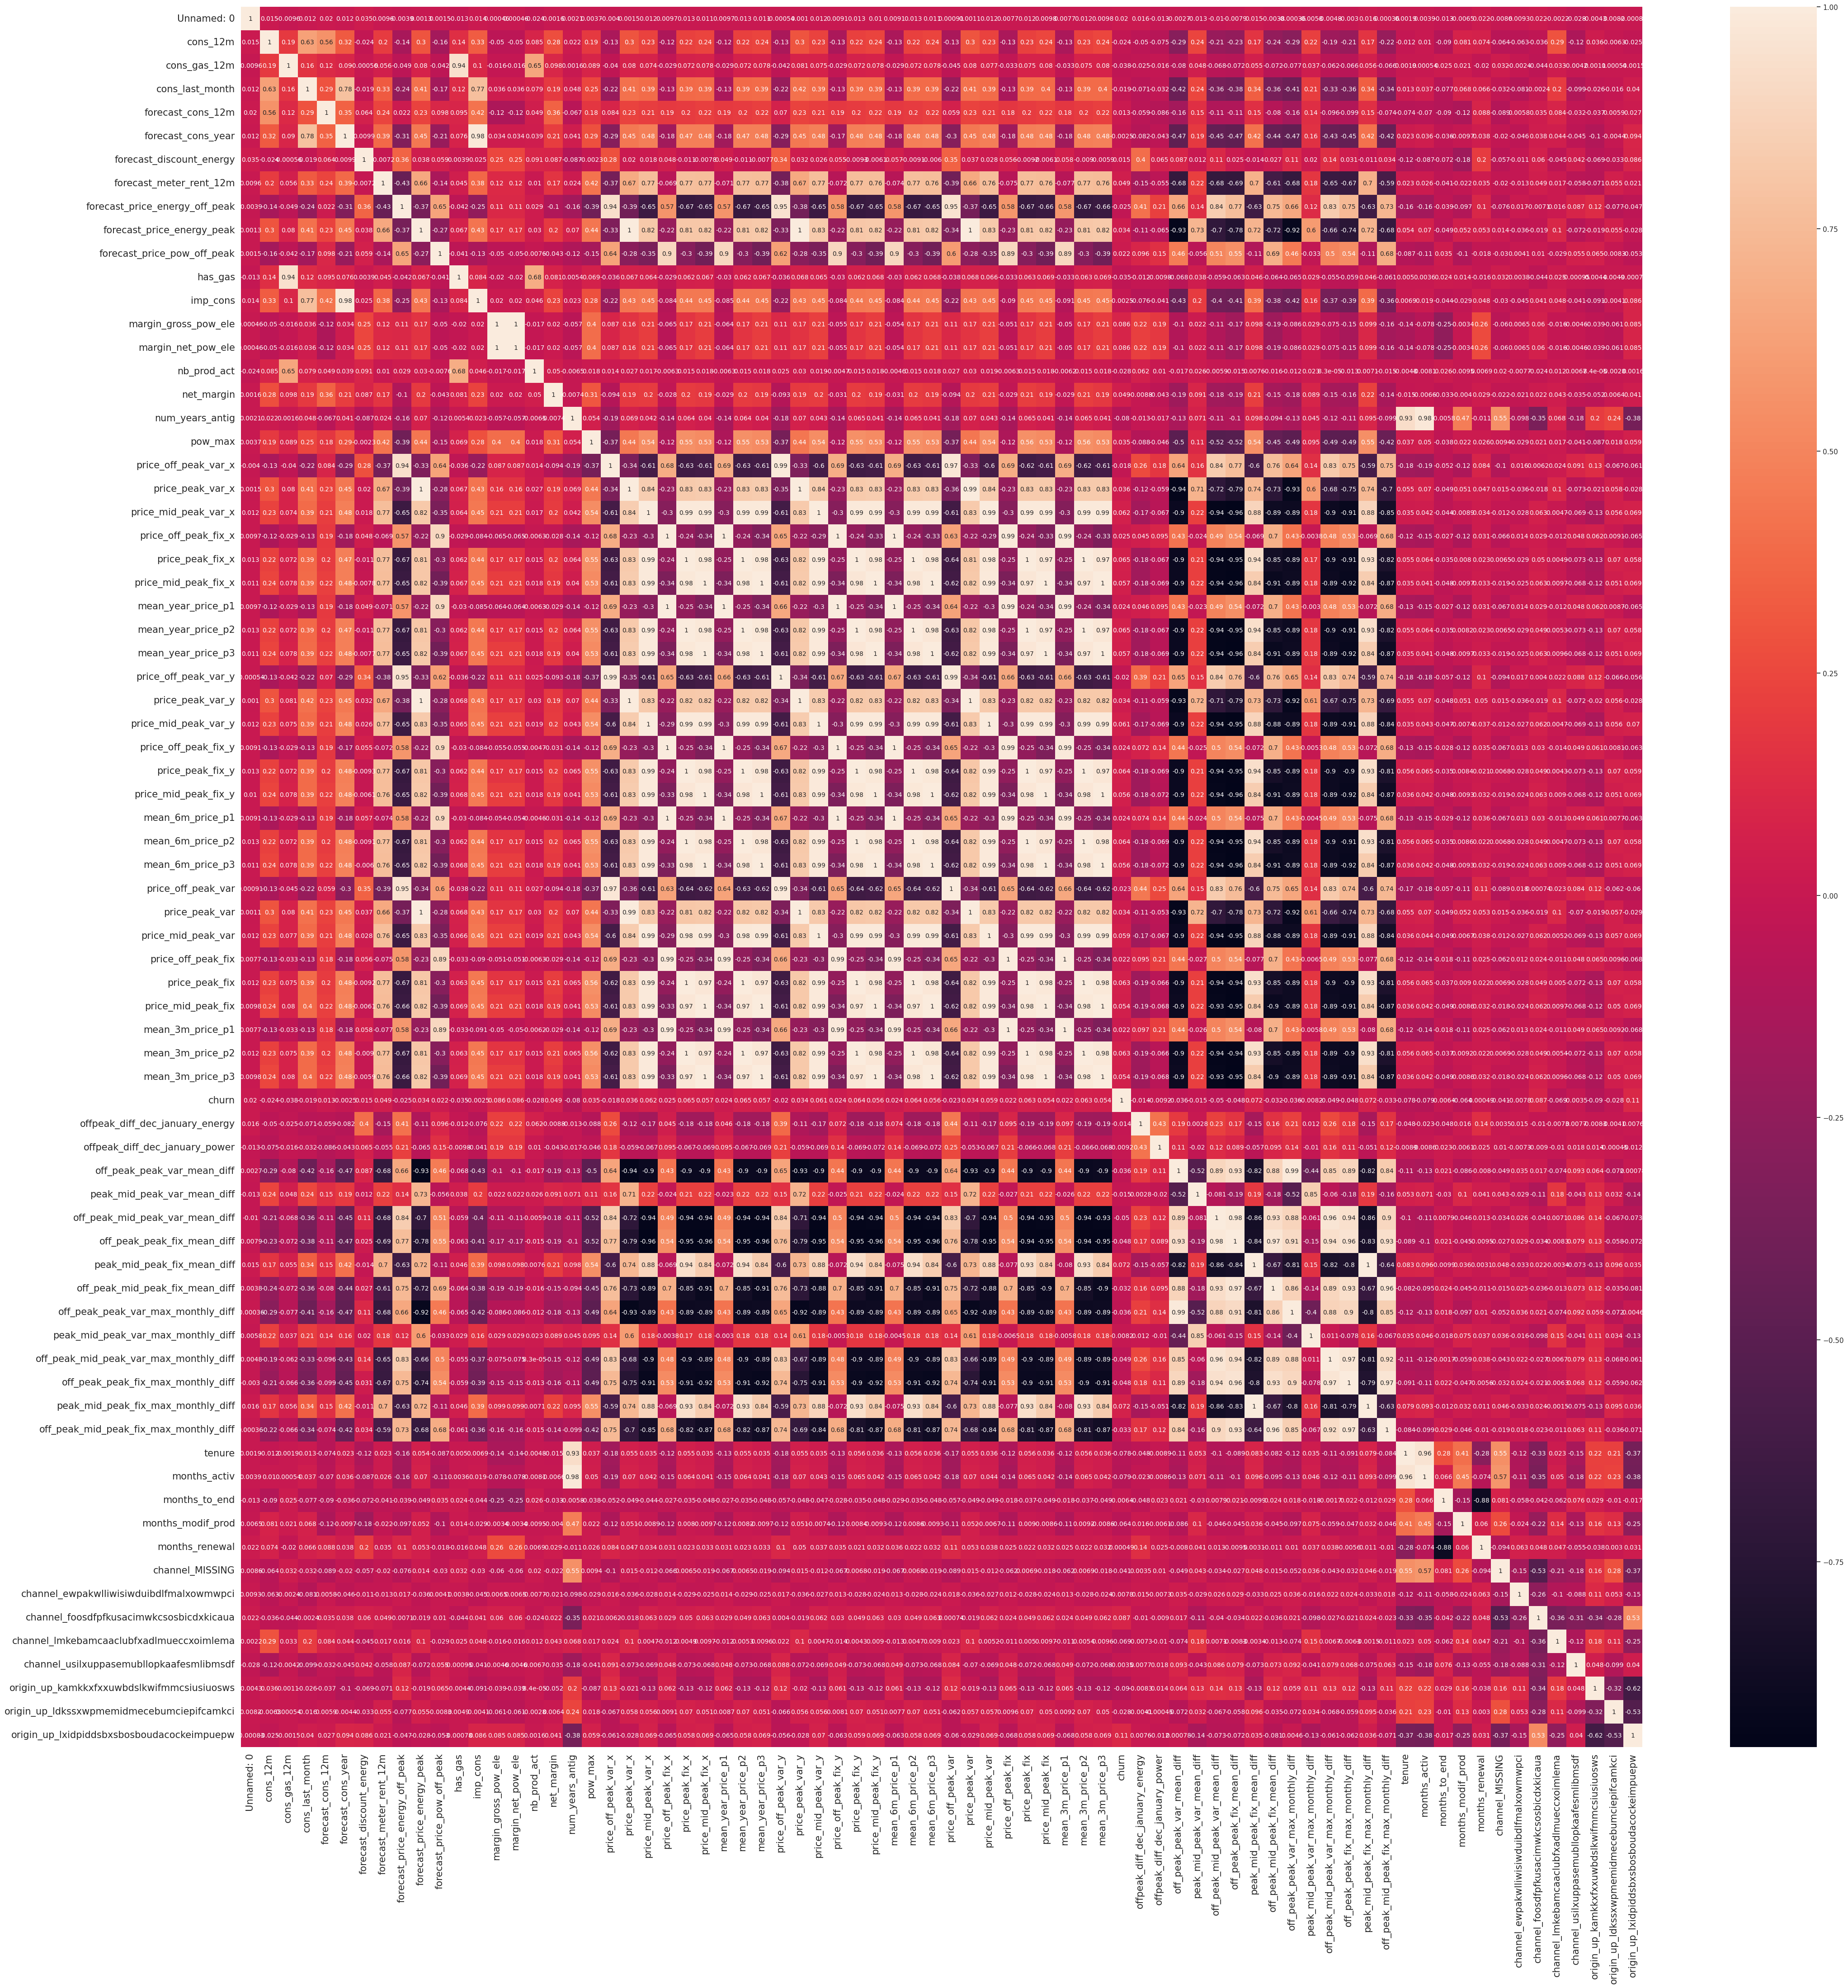

In [30]:
# Plot correlation
plt.figure(figsize=(50, 50))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 10}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

I will leave it as an exercise for yourself to decide which features to remove based on the correlation results (there are various methods you can use to decide which features to remove).

For now, I will remove two variables which exhibit a high correlation with other independent features.

In [31]:
df = df.drop(columns=['num_years_antig', 'forecast_cons_year'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  764c75f661154dac3a6c254cd082ea7d  2.736397           0.0   
1           1  01495c955be7ec5e7f3203406785aae0  4.470602           0.0   
2           2  d5e512dbc8118a830a7b8c7f61d89992  4.034709           0.0   
3           3  21860c2ff2d5df75503b230ce629c253  3.888011           0.0   
4           4  e4773b60d2e68aac94795782abfc006b  4.672283           0.0   

   cons_last_month  forecast_cons_12m  forecast_discount_energy  \
0         0.000000           1.689841                       0.0   
1         3.100715           2.937382                       0.0   
2         3.493179           3.081196                       0.0   
3         0.000000           2.961469                       0.0   
4         3.499962           3.227447                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                 1.599009                        0.165794   
1                 2.162833                        0.115174   
2                 1.341237                        0.164637   
3                 1.878866                        0.162327   
4                 1.232488                        0.144902   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.087899  ...                 68               8   
1                    0.098837  ...                 68               8   
2                    0.087381  ...                 53               5   
3                    0.084428  ...                  1               0   
4                    0.000000  ...                 44               8   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                0                                         0   
2                0                                         0   
3                0                                         0   
4                0                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         1   
2                                         0   
3                                         1   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         1   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           1   
1                                           0   
2                                           1   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           1   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           0  
1                                           1  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 73 columns]

---

## 5. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [32]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [33]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['Unnamed: 0','forecast_meter_rent_12m','id', 'churn'])
print(X.shape)
print(y.shape)

(5845, 69)
(5845,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4383, 69)
(4383,)
(1462, 69)
(1462,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [35]:
model = RandomForestClassifier(
    n_estimators=1000
)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

The `scikit-learn` documentation: <https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html>, has a lot of information about the algorithm and the parameters that you can use when training a model.

For this example, I am using `n_estimators` = 1000. This means that my random forest will consist of 1000 decision trees. There are many more parameters that you can fine-tune within the random forest and finding the optimal combinations of parameters can be a manual task of exploration, trial and error, which will not be covered during this notebook.

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

We are going to use 3 metrics to evaluate performance:

- Accuracy = the ratio of correctly predicted observations to the total observations
- Precision = the ability of the classifier to not label a negative sample as positive
- Recall = the ability of the classifier to find all the positive samples

The reason why we are using these three metrics is because a simple accuracy is not always a good measure to use. To give an example, let's say you're predicting heart failures with patients in a hospital and there were 100 patients out of 1000 that did have a heart failure. 

If you predicted 80 out of 100 (80%) of the patients that did have a heart failure correctly, you might think that you've done well! However, this also means that you predicted 20 wrong and what may the implications of predicting these remaining 20 patients wrong? Maybe they miss out on getting vital treatment to save their lives. 

As well as this, what about the impact of predicting negative cases as positive (people not having heart failure being predicted that they did), maybe a high number of false positives means that resources get used up on thee wrong people and a lot of time is wasted when they could have been helping the real heart failure sufferers. 

This is just an example, but it illustrates why other performance metrics are necessary such `Precision` and `Recall`, which are good measures to use in a classification scenario.

In [36]:
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [37]:
y_test.value_counts()

0    1315
1     147
Name: churn, dtype: int64

In [38]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 6
False positives: 7
True negatives: 1308
False negatives: 141

Accuracy: 0.8987688098495212
Precision: 0.46153846153846156
Recall: 0.04081632653061224


Looking at these results there are a few things to point out:

<b>Note:</b> If you are running this notebook yourself, you may get slightly different answers!

- Within the test set about 10% of the rows are churners (churn = 1).
- Looking at the true negatives, we have 1310 out of 1315. This means that out of all the negative cases (churn = 0), we predicted 1311 as negative (hence the name True negative). This is great!
- Looking at the false negatives, this is where we have predicted a client to not churn (churn = 0) when in fact they did churn (churn = 1). This number is quite high at 141, we want to get the false negatives to as close to 0 as we can, so this would need to be addressed when improving the model.
- Looking at false positives, this is where we have predicted a client to churn when they actually didnt churn. For this value we can see there are 5 cases, which is great!
- With the true positives, we can see that in total we have 147 clients that churned in the test dataset. However, we are only able to correctly identify 6 of those 147, which is very poor.
- Looking at the accuracy score, this is very misleading! Hence the use of precision and recall is important. The accuracy score is high, but it does not tell us the whole story.
- Looking at the precision score, this shows us a score of 0.90 which is not bad, but could be improved.
- However, the recall shows us that the classifier has a very poor ability to identify positive samples. This would be the main concern for improving this model!

So overall, we're able to very accurately identify clients that do not churn, but we are not able to predict cases where clients do churn! What we are seeing is that a high % of clients are being identified as not churning when they should be identified as churning. This in turn tells me that the current set of features are not discriminative enough to clearly distinguish between churners and non-churners. 

A data scientist at this point would go back to feature engineering to try and create more predictive features. They may also experiment with optimising the parameters within the model to improve performance. For now, lets dive into understanding the model a little more.

### Model understanding

A simple way of understanding the results of a model is to look at feature importances. Feature importances indicate the importance of a feature within the predictive model, there are several ways to calculate feature importance, but with the Random Forest classifier, we're able to extract feature importances using the built-in method on the trained model. In the Random Forest case, the feature importance represents the number of times each feature is used for splitting across all trees.

Looking at these results there are a few things to point out:

<b>Note:</b> If you are running this notebook yourself, you may get slightly different answers!

- Within the test set about 10% of the rows are churners (churn = 1).
- Looking at the true negatives, we have 3282 out of 3286. This means that out of all the negative cases (churn = 0), we predicted 3282 as negative (hence the name True negative). This is great!
- Looking at the false negatives, this is where we have predicted a client to not churn (churn = 0) when in fact they did churn (churn = 1). This number is quite high at 348, we want to get the false negatives to as close to 0 as we can, so this would need to be addressed when improving the model.
- Looking at false positives, this is where we have predicted a client to churn when they actually didnt churn. For this value we can see there are 4 cases, which is great!
- With the true positives, we can see that in total we have 366 clients that churned in the test dataset. However, we are only able to correctly identify 18 of those 366, which is very poor.
- Looking at the accuracy score, this is very misleading! Hence the use of precision and recall is important. The accuracy score is high, but it does not tell us the whole story.
- Looking at the precision score, this shows us a score of 0.82 which is not bad, but could be improved.
- However, the recall shows us that the classifier has a very poor ability to identify positive samples. This would be the main concern for improving this model!

So overall, we're able to very accurately identify clients that do not churn, but we are not able to predict cases where clients do churn! What we are seeing is that a high % of clients are being identified as not churning when they should be identified as churning. This in turn tells me that the current set of features are not discriminative enough to clearly distinguish between churners and non-churners. 

A data scientist at this point would go back to feature engineering to try and create more predictive features. They may also experiment with optimising the parameters within the model to improve performance. For now, lets dive into understanding the model a little more.

### Model understanding

A simple way of understanding the results of a model is to look at feature importances. Feature importances indicate the importance of a feature within the predictive model, there are several ways to calculate feature importance, but with the Random Forest classifier, we're able to extract feature importances using the built-in method on the trained model. In the Random Forest case, the feature importance represents the number of times each feature is used for splitting across all trees.

In [39]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


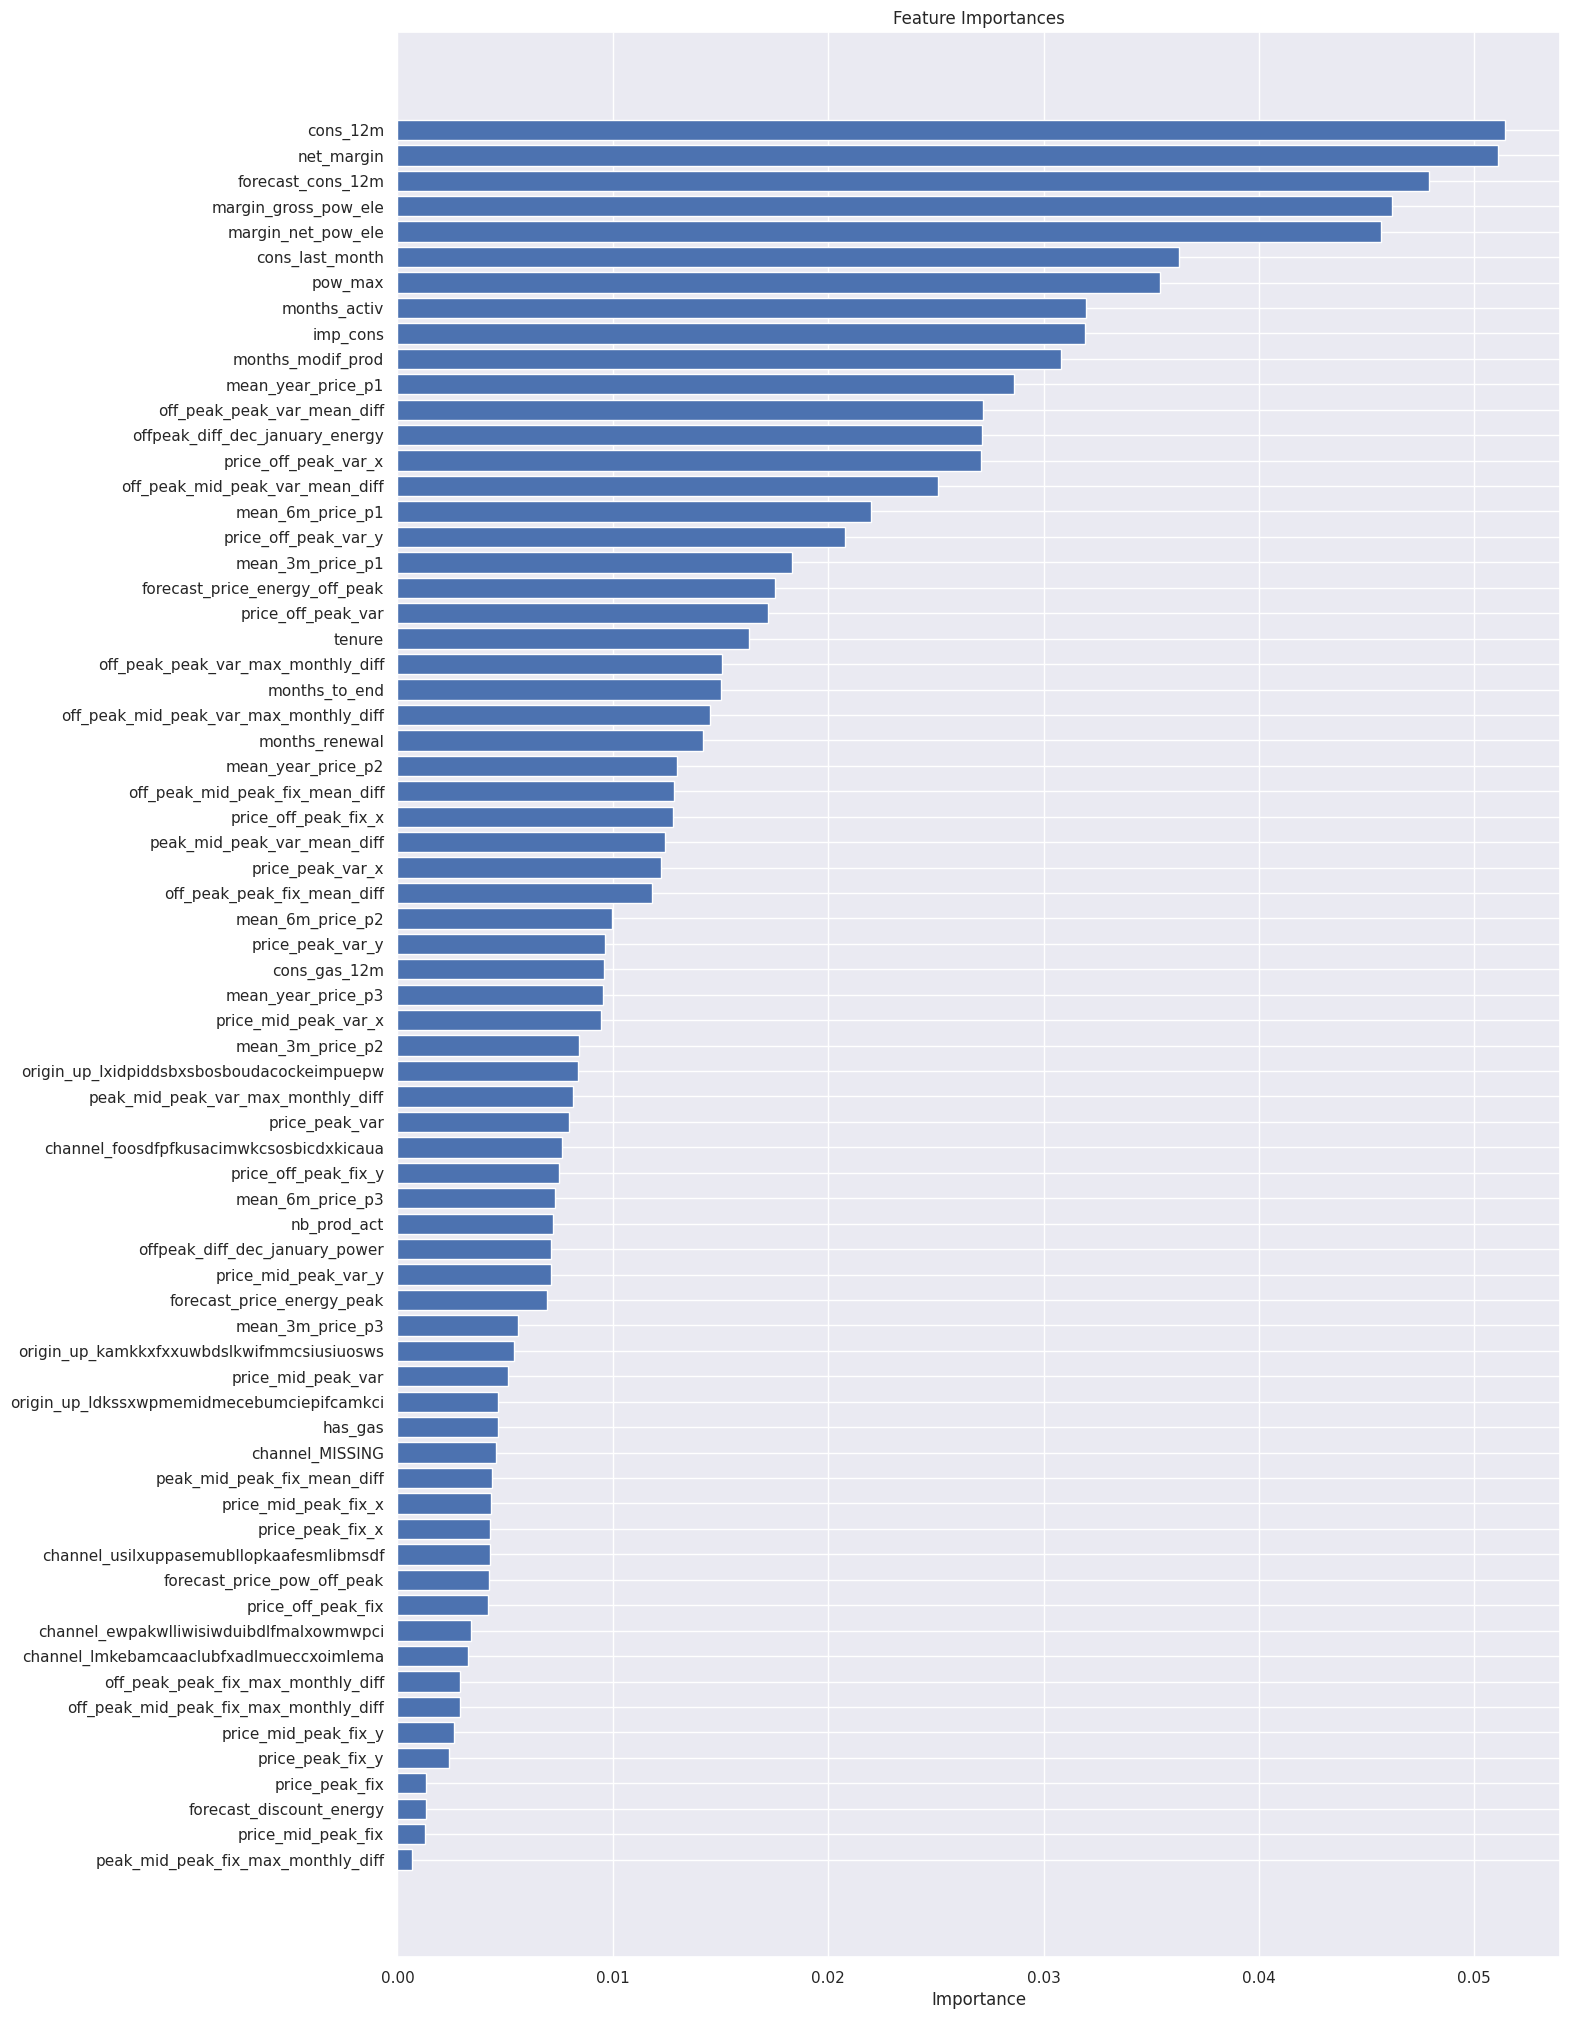

In [40]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

- Net margin and consumption over 12 months is a top driver for churn in this model
- Margin on power subscription also is an influential driver
- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
- The feature that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it
- Our price sensitivity features are scattered around but are not the main driver for a customer churning

The last observation is important because this relates back to our original hypothesis:

    > Is churn driven by the customers' price sensitivity?

Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

In [41]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [42]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [43]:
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('\Content\out_of_sample_data_with_predictions.csv')